### Libraries

In [2]:
import pandas as pd
import numpy as np
import math 
import random
import matplotlib.pyplot as plt
from scipy.stats import poisson
import xlrd 

import sklearn
from sklearn import linear_model
from sklearn import tree

import torch  
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

### Dataset (age based Population, PPI, SVI)

In [3]:
Data= np.array(pd.read_csv('Dataset.csv'));
X= Data[:,6:12] # age based popultaion data+ disease burden+svi for training the regressor
Y_wkd= Data[:,4] # average admission in weekdays
Y_end= Data[:,3] # average admission in weekends
dis_burden_county=Data[:,10] # Refer to regional data L-34
svi_county= Data[0:67,11] ### Social vulnerability Index: mean of year 2010,2013,2016,2019
ppi_county= Data[0:67,12] ### Price Parity Index: of 2019
bed_county=Data[0:67,13]  ### Number of hospital bed at 2020 (start of the simulation)

### Train Year 2010-2016
X_train=X[:469,:]
Y_wkd_train=Y_wkd[:469]
Y_end_train=Y_end[:469]

### Test Year 2017
X_test=X[469:,:]
Y_wkd_test=Y_wkd[469:]
Y_end_test=Y_end[469:]

# Population- Hospital Admission regression fit

weekdays:
90.7
90.7
90.9
94.1
94.3
weekends:
90.6
90.7
90.6
95.5
96.2


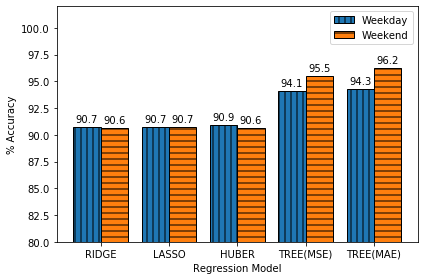

In [15]:
#%%time

def diff(test_y,pred):
    dif=np.zeros(len(test_y))
    for j in range(len(test_y)):
        dif[j]= np.absolute(test_y[j]-pred[j])
    return dif

############## weekday hospital admission regression fit
diff_wkday_ridge = []
diff_wkday_lasso = []
diff_wkday_huber = []
diff_wkday_dtree = []
diff_wkday_dtree_mae = []

for i in range(0,10):
    ridge_wkday = linear_model.Ridge(max_iter=10000)
    ridge_wkday.fit(X_train,Y_wkd_train)
    predictions_ridge = ridge_wkday.predict(X_test)
    diff_wkday_ridge_rate = diff(Y_wkd_test, predictions_ridge)
    diff_wkday_ridge =np.append(diff_wkday_ridge ,diff_wkday_ridge_rate)

    lasso_wkday = linear_model.Lasso(max_iter=10000)
    lasso_wkday.fit(X_train,Y_wkd_train)
    predictions_lasso = lasso_wkday.predict(X_test)
    diff_wkday_lasso_rate = diff(Y_wkd_test, predictions_lasso)
    diff_wkday_lasso =np.append(diff_wkday_lasso ,diff_wkday_lasso_rate)

    huber_wkday = linear_model.HuberRegressor(max_iter=10000)
    huber_wkday.fit(X_train, Y_wkd_train)
    predictions_huber= huber_wkday.predict(X_test)
    diff_wkday_huber_rate = diff(Y_wkd_test, predictions_huber)
    diff_wkday_huber =np.append(diff_wkday_huber ,diff_wkday_huber_rate)

    dtree_wkday= tree.DecisionTreeRegressor(criterion='mse')
    dtree_wkday.fit(X_train, Y_wkd_train)
    predictions_dtree= dtree_wkday.predict(X_test)
    diff_wkday_dtree_rate = diff(Y_wkd_test, predictions_dtree)
    diff_wkday_dtree =np.append(diff_wkday_dtree ,diff_wkday_dtree_rate)

    dtree_mae= tree.DecisionTreeRegressor(criterion='mae')
    dtree_mae.fit(X_train, Y_wkd_train)
    predictions_dtree_mae= dtree_mae.predict(X_test)
    diff_wkday_dtree_mae_rate = diff(Y_wkd_test, predictions_dtree_mae)
    diff_wkday_dtree_mae =np.append(diff_wkday_dtree_mae ,diff_wkday_dtree_mae_rate)

performance_wkday_ridge=round(100-np.mean(diff_wkday_ridge)/np.mean(Y_wkd_test)*100,1)
performance_wkday_lasso=round(100-np.mean(diff_wkday_lasso)/np.mean(Y_wkd_test)*100,1)
performance_wkday_huber=round(100-np.mean(diff_wkday_huber)/np.mean(Y_wkd_test)*100,1)
performance_wkday_dtree=round(100-np.mean(diff_wkday_dtree)/np.mean(Y_wkd_test)*100,1)
performance_wkday_dtree_mae=round(100-np.mean(diff_wkday_dtree_mae)/np.mean(Y_wkd_test)*100,1)

print("weekdays:")
print(performance_wkday_ridge)
print(performance_wkday_lasso)
print(performance_wkday_huber)
print(performance_wkday_dtree)
print(performance_wkday_dtree_mae)

performance_wkday = [performance_wkday_ridge,performance_wkday_lasso,performance_wkday_huber,performance_wkday_dtree,performance_wkday_dtree_mae]

############## weekend hospital admission regression fit

diff_wknd_ridge = []
diff_wknd_lasso = []
diff_wknd_huber = []
diff_wknd_dtree = []
diff_wknd_dtree_mae = []

for i in range(0,10):
    ridge_wknd = linear_model.Ridge(max_iter=10000)
    ridge_wknd.fit(X_train,Y_end_train)
    predictions_ridge = ridge_wknd.predict(X_test)
    diff_wknd_ridge_rate = diff(Y_end_test, predictions_ridge)
    diff_wknd_ridge =np.append(diff_wknd_ridge ,diff_wknd_ridge_rate)

    lasso_wknd = linear_model.Lasso(max_iter=10000)
    lasso_wknd.fit(X_train,Y_end_train)
    predictions_lasso = lasso_wknd.predict(X_test)
    diff_wknd_lasso_rate = diff(Y_end_test, predictions_lasso)
    diff_wknd_lasso =np.append(diff_wknd_lasso ,diff_wknd_lasso_rate)

    huber_wknd = linear_model.HuberRegressor(max_iter=10000)
    huber_wknd.fit(X_train, Y_end_train)
    predictions_huber= huber_wknd.predict(X_test)
    diff_wknd_huber_rate = diff(Y_end_test, predictions_huber)
    diff_wknd_huber =np.append(diff_wknd_huber ,diff_wknd_huber_rate)

    dtree_wknd= tree.DecisionTreeRegressor(criterion='mse')
    dtree_wknd.fit(X_train, Y_end_train)
    predictions_dtree= dtree_wknd.predict(X_test)
    diff_wknd_dtree_rate = diff(Y_end_test, predictions_dtree)
    diff_wknd_dtree =np.append(diff_wknd_dtree ,diff_wknd_dtree_rate)

    dtree_mae_wknd= tree.DecisionTreeRegressor(criterion='mae')
    dtree_mae_wknd.fit(X_train, Y_end_train)
    predictions_dtree_mae= dtree_mae_wknd.predict(X_test)
    diff_wknd_dtree_mae_rate = diff(Y_end_test, predictions_dtree_mae)
    diff_wknd_dtree_mae =np.append(diff_wknd_dtree_mae ,diff_wknd_dtree_mae_rate)

performance_wknd_ridge=round(100-np.mean(diff_wknd_ridge)/np.mean(Y_end_test)*100,1)
performance_wknd_lasso=round(100-np.mean(diff_wknd_lasso)/np.mean(Y_end_test)*100,1)
performance_wknd_huber=round(100-np.mean(diff_wknd_huber)/np.mean(Y_end_test)*100,1)
performance_wknd_dtree=round(100-np.mean(diff_wknd_dtree)/np.mean(Y_end_test)*100,1)
performance_wknd_dtree_mae=round(100-np.mean(diff_wknd_dtree_mae)/np.mean(Y_end_test)*100,1)

print("weekends:")
print(performance_wknd_ridge)
print(performance_wknd_lasso)
print(performance_wknd_huber)
print(performance_wknd_dtree)
print(performance_wknd_dtree_mae)


performance_wknd = [performance_wknd_ridge,performance_wknd_lasso,performance_wknd_huber,performance_wknd_dtree,performance_wknd_dtree_mae]


labels = ('RIDGE', 'LASSO', 'HUBER', 'TREE(MSE)','TREE(MAE)')
x = np.arange(len(labels))
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, performance_wkday, width, edgecolor='black', hatch="||", label='Weekday')
rects2 = ax.bar(x + width/2, performance_wknd, width, edgecolor='black',hatch= "--",label='Weekend')

ax.set_ylabel('% Accuracy')
ax.set_xlabel('Regression Model')
#ax.set_title('Average Classification Accuracy vs reg_ression Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.ylim([80,102])
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
#plt.savefig('bedfit.pdf')     
plt.show()

### Population Projection

In [12]:
x = np.array([0,5, 10,15, 20, 25]); ## projection given for year (2020,2025,2030,2035,2040,2045)
x_new = np.linspace(0, 30, num=31); ## interpolated for 2020-2050

pop_low= np.zeros((67,31,4)); # population
pop_med= np.zeros((67,31,4));
pop_high= np.zeros((67,31,4));

projection = xlrd.open_workbook("projections_2020.xlsx"); 
projection = projection.sheet_by_index(0);
projection_low= np.zeros((67,6));
projection_med= np.zeros((67,6));
projection_high= np.zeros((67,6));
for m in range(67):
	for n in range(6):   
		projection_low[m,n]=projection.cell_value(5*m+4,n+3);
		projection_med[m,n]=projection.cell_value(5*m+5,n+3);
		projection_high[m,n]=projection.cell_value(5*m+6,n+3);

	coeff_low= np.polyfit(x, projection_low[m,:], 5);   
	ffit_low= np.poly1d(coeff_low);   

	coeff_med= np.polyfit(x, projection_med[m,:], 5);   
	ffit_med= np.poly1d(coeff_med);    

	coeff_high= np.polyfit(x, projection_high[m,:], 5);   
	ffit_high= np.poly1d(coeff_high); 

	for age in range(4):
		pop_low[m,:,age]=np.round(Data[469+m,age+6]/Data[469+m,5]*ffit_low(x_new))
		pop_med[m,:,age]=np.round(Data[469+m,age+6]/Data[469+m,5]*ffit_med(x_new))
		pop_high[m,:,age]=np.round(Data[469+m,age+6]/Data[469+m,5]*ffit_high(x_new))


## County Partion for Health Regions 
Regions: R1=[15,45,56,65]
R2=[2,6,17,18,21,28,30,31,35,37,38,61,64,66]
R3=[0,3,8,11,13,19,22,25,32,33,36,40,53,59,60,62]
R4=[1,9,14,16,44,54,63]
R5=[50,51]
R6=[23,26,27,39,52]
R7=[4,47,48,58]
R8=[7,10,12,20,24,34,57]
R9=[29,41,46,49,55]
R10=[5]
R11=[42,43]

In [13]:
Region=[15,45,56,65,2,6,17,18,21,28,30,31,35,37,38,61,64,66,0,3,8,11,13,19,22,25,32,33,36,40,53,59,60,62,
        1,9,14,16,44,54,63,50,51,23,26,27,39,52,4,47,48,58,7,10,12,20,24,34,57,29,41,46,49,55,5,42,43]
Index=[4,14,16,7,2,5,4,7,5,1,2]
regional_low= np.zeros((11,31,6)); #  Regional population
regional_med= np.zeros((11,31,6));
regional_high= np.zeros((11,31,6));
population= np.zeros((8,11,4));
d_burden=np.zeros((11));
count=0
ppi= np.zeros(12); # the first ppi value corresponds to no action
svi= np.zeros(11);
bed= np.zeros(11);
patient= np.zeros((11,8*2)); # for drawing Table in overleaf
total_pop= np.zeros((8,11)); # for drawing a picture in overleaf
weekdays= np.zeros((8,11)); # for drawing a picture in overleaf
weekend= np.zeros((8,11)); # for drawing a picture in overleaf

for r in range(11):
	for c in range(Index[r]):
		regional_low[r,:,0:4]+=pop_low[Region[count+c],:,:]
		regional_med[r,:,0:4]+=pop_med[Region[count+c],:,:]
		regional_high[r,:,0:4]+=pop_high[Region[count+c],:,:]
        
		ppi[r+1]+=ppi_county[Region[count+c]]
		svi[r]+=svi_county[Region[count+c]]
		bed[r]+=bed_county[Region[count+c]]
		for y in range(8):
			patient[r,2*y]+= Y_wkd[67*y+Region[(count+c)% 67]]
			patient[r,2*y+1]+= Y_end[67*y+Region[(count+c)% 67]]
			total_pop[y,r]+= Data[[67*y+Region[(count+c)% 67]],5]
			population[y,r,:]+=np.sum(Data[[67*y+Region[(count+c)% 67]],6:10])
			weekdays[y,r]+=  Y_wkd[67*y+Region[(count+c)% 67]]
			weekend[y,r]+= Y_end[67*y+Region[(count+c)% 67]]
			d_burden[r]+=dis_burden_county[67*y+Region[(count+c)% 67]]

	ppi[r+1]/=Index[r] 
	svi[r]/=Index[r] 
	d_burden[r]/=(Index[r]*8) # 8 year average

	regional_low[r,:,4]=d_burden[r]
	regional_med[r,:,4]=d_burden[r]
	regional_high[r,:,4]=d_burden[r]

	regional_low[r,:,5]=svi[r]
	regional_med[r,:,5]=svi[r]
	regional_high[r,:,5]=svi[r]    
    
	count+=Index[r]   

### Parameters

In [16]:
#parameters for cost definition in M USD
alpha=50; #cost multiplier for augmenting 1 bed; i.e investment cost= alpha* no. of capacity increase
del_H= 120; # 120 beds,as unit of augmentation
avg_stay=4.7;
sigma=0.2; ## uncertainity in the daily admission from mean data  

lamda_wkday= np.zeros((11,31)) ### poison mean for weekday admission
lamda_wknd= np.zeros((11,31)) ### poison mean for weekend admission
for c in range(11):
	lamda_wkday[c,:]= huber_wkday.predict(regional_med[c,:,:])
	lamda_wknd[c,:]= huber_wknd.predict(regional_med[c,:,:])        

### Deep MORL

In [17]:
class Actor(nn.Module):
    def __init__(self, learning_rate=3e-4):
        super(Actor, self).__init__()

        self.num_inputs=88 
        self.num_actions = 12
        self.actor_linear1 = nn.Linear(self.num_inputs, 12)
        self.actor_linear2 = nn.Linear(12, 120)
        self.actor_linear3 = nn.Linear(120, 48)
        self.actor_linear4 = nn.Linear(48, self.num_actions)
   
    def forward(self, state):
        state = Variable(torch.from_numpy(state).float())
        policy_dist = self.actor_linear1(state)
        policy_dist = self.actor_linear2(policy_dist)
        policy_dist = F.relu(self.actor_linear3(policy_dist))                
        policy_dist = F.softmax(self.actor_linear4(policy_dist), dim=1)

        return policy_dist      

In [18]:
class Critic_money(nn.Module):
    def __init__(self, learning_rate=3e-4):
        super(Critic_money, self).__init__()

        self.num_inputs=88 
        self.critic_linear1 = nn.Linear(self.num_inputs, 12)
        self.critic_linear2 = nn.Linear(12, 120)
        self.critic_linear3 = nn.Linear(120, 48)        
        self.critic_linear4 = nn.Linear(48, 1)
 
    def forward(self, state):
        state = Variable(torch.from_numpy(state).float())
        value = self.critic_linear1(state)
        value = self.critic_linear2(value)
        value = F.relu(self.critic_linear3(value))                
        value = self.critic_linear4(value)

        return value     

In [22]:
class Critic_DoS(nn.Module):
    def __init__(self, learning_rate=3e-4):
        super(Critic_DoS, self).__init__()

        self.num_inputs=88 
        self.critic_linear1 = nn.Linear(self.num_inputs, 12)
        self.critic_linear2 = nn.Linear(12, 120)
        self.critic_linear3 = nn.Linear(120, 48)        
        self.critic_linear4 = nn.Linear(48, 1)
 
    def forward(self, state):
        state = Variable(torch.from_numpy(state).float())
        value = self.critic_linear1(state)
        value = self.critic_linear2(value)
        value = F.relu(self.critic_linear3(value))                
        value = self.critic_linear4(value)

        return value     

In [297]:
%%time
### Pareto Optimal, episodic update only for same signed advantage function### 

GAMMA = 0.99
years = 30
episodes = 10000
w_E= 0.5; #objective priority
actor = Actor()
actor_optimizer = optim.Adam(actor.parameters(), lr=3e-4)
critic_money = Critic_money()
critic_money_optimizer = optim.Adam(critic_money.parameters(), lr=3e-4)
critic_DoS = Critic_DoS()
critic_DoS_optimizer = optim.Adam(critic_DoS.parameters(), lr=3e-4)

all_costs_morl= []
all_DoS_morl= []
yearly_cost_morl= np.zeros(years); # cumulative cost for the system viewed yearly
yearly_DoS_morl =np.zeros(years); # cumulative DoS for the system viewed yearly
H= np.zeros(11);
   
for episode in range(episodes):
	log_probs = []; # log probabilities of action
	values_money = np.zeros(years)
	values_DoS = np.zeros(years)
	costs = np.zeros(years)
	DoS = np.zeros(years)

	H[:]=bed[:]

	x= np.zeros(31); #  yearly agent's decision         
	state= np.zeros((1,11*8));
	for y in range(years):

		for c in range (11):
			state[0,8*c:8*c+4]= regional_med[c,y+1,0:4]/50000
			state[0,8*c+4]= d_burden[c]/1000
			state[0,8*c+5]= svi[c];
			state[0,8*c+6]= ppi[c+1];
			state[0,8*c+7]= H[c]/1000;

		policy_dist = actor.forward(state)
		dist = policy_dist.detach().numpy() # converts tensor to array
		action =np.random.choice(12, p=np.squeeze(dist))
        
		value_money = critic_money.forward(state)
		values_money[y] = value_money.detach().numpy() # converts tensor to array
		value_DoS = critic_DoS.forward(state)
		values_DoS[y] = value_DoS.detach().numpy() # converts tensor to array
        
		x[y]= action; 
		if action > 0:
			H[action-1]= H[action-1]+del_H; 
            
		r= np.zeros(365);## random bed requirement for a day   
		complain= np.zeros((11,365));## DoS per day   
        
		for county in range(11):
			for d in range(261): #weekday
				r[d] = np.round( np.random.normal(poisson.rvs(lamda_wkday[county,y], size=1)*(0.70+ 0.006* random.randrange(101))*avg_stay, sigma, 1));# per day hospital bed requirement 
            
				if r[d] > H[county] :# if number of bed required is higher than the capacity
					complain[county,d]= r[d]-H[county] 

			for d2 in range(104): #weekend
				r[261+d2] = np.round( np.random.normal(poisson.rvs(lamda_wknd[county,y], size=1)*(0.70+ 0.006* random.randrange(101))*avg_stay, sigma, 1));# per day hospital bed requirement 
            
				if r[261+d2] > H[county] :# if number of bed required is higher than the capacity
					complain[county,261+d2]= r[261+d2]-H[county] 
                    
		costs[y]=alpha*ppi[action]*np.ceil(action/11);        
		DoS[y]= sum(sum(complain));
        
		log_prob = torch.log(policy_dist.squeeze(0)[action])
		log_probs.append(log_prob)
      
		yearly_cost_morl[y]+= costs[y]       
		yearly_DoS_morl[y]+= DoS[y]       
 
	for e in range (11):
		state[0,8*e:8*e+4]= regional_med[e,y+1,0:4]/50000
		state[0,8*e+4]= d_burden[e]/1000
		state[0,8*e+5]= svi[e];
		state[0,8*e+6]= ppi[e+1];
		state[0,8*e+7]= H[e]/1000;

	Qval_money= critic_money.forward(state)
	Qval_money = Qval_money.detach().numpy()
    
	Qval_DoS= critic_DoS.forward(state)
	Qval_DoS = Qval_DoS.detach().numpy() 
    
	all_costs_morl.append(np.sum(costs))
	all_DoS_morl.append(np.sum(DoS)/1000)
            
	if episode % 500== 50:                    
		print("episode: {:.0f}/ episodes, Total Cost in Millions USD: {:.0f}\n" .format(episode, np.sum(all_costs_morl)/(episode+1)))
            
	Qvals_money = np.zeros(years)
	for t in reversed(range(years)):
		Qval_money = -costs[t]/500 + GAMMA * Qval_money
		Qvals_money[t] = Qval_money  

	Qvals_DoS = np.zeros(years)
	for t in reversed(range(years)):
		Qval_DoS = -DoS[t]/50000 + GAMMA * Qval_DoS
		Qvals_DoS[t] = Qval_DoS 
        
        #update actor critic
	values_money = torch.FloatTensor(values_money)
	values_DoS = torch.FloatTensor(values_DoS)

	Qvals_money = torch.FloatTensor(Qvals_money)
	Qvals_DoS = torch.FloatTensor(Qvals_DoS)
	log_probs = torch.stack(log_probs)

	advantage_money = Qvals_money - values_money
	advantage_DoS = Qvals_DoS - values_DoS
    
	critic_loss_money = 0.5 * advantage_money.pow(2).mean()
	critic_loss_money = Variable(critic_loss_money, requires_grad=True)

	critic_money_optimizer.zero_grad() #Sets gradients of all model parameters to zero, needs to be done before "ac_loss.backward()"
	critic_loss_money.backward()
	critic_money_optimizer.step()
    
	critic_loss_DoS = 0.5 * advantage_DoS.pow(2).mean()
	critic_loss_DoS = Variable(critic_loss_DoS, requires_grad=True)

	critic_DoS_optimizer.zero_grad() #Sets gradients of all model parameters to zero, needs to be done before "ac_loss.backward()"
	critic_loss_DoS.backward()
	critic_DoS_optimizer.step()

#### remove the elements with different sign in advantage functions####
	advantage=[]
	log_prob_pareto=[]
	actor_loss=0
    
	for i in range(years):
		if (advantage_money[i]>0 and advantage_DoS[i]>0) or (advantage_money[i]<0 and advantage_DoS[i]<0):            
			advantage.append(advantage_money[i]*w_E+advantage_DoS[i]*(1-w_E)) # objective priority
			log_prob_pareto.append(log_probs[i])
			actor_loss += ((advantage_money[i]*w_E+advantage_DoS[i]*(1-w_E))* log_probs[i])
    
	actor_loss = actor_loss/len(advantage)
	actor_optimizer.zero_grad() #Sets gradients of all model parameters to zero, needs to be done before "ac_loss.backward()"
	actor_loss.backward()
	actor_optimizer.step()